<a href="https://colab.research.google.com/github/tienmai56/coderschool-devc/blob/master/Copy_of_Copy_of_TED_Talks_CleanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset - Ted talks


### Step 1 - Checking the data

**Import tools set**

In [0]:
import pandas as pd
import seaborn as sns

**Import data**

In [0]:
#import data
#let's read our beloved data
data = pd.read_csv('https://drive.google.com/uc?authuser=0&id=1fYyeYBes1Fa3Qb_bOQQxUDo3gR_jC7ka&export=download')



In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


### Step 2 - Cleaning the data

In [0]:
#display sample data
data.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [0]:
#data.groupby('event')['title'].count()

In [0]:
#use describe to display general info
data.describe()
#1. On average, a TED talk lasts for 826 seconds ~ 13 minutes
#2. The maximum number of languages that a ted talk was translated to is 72 



,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [0]:
#check data's shape
data.shape


#2550 rows and 17 columns

(2550, 17)

In [0]:
#check rows & columns 
data.columns.values

array(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker',
       'published_date', 'ratings', 'related_talks', 'speaker_occupation',
       'tags', 'title', 'url', 'views'], dtype=object)

In [0]:
#check if there's any absurd data that don't making any freaking sense
speaker=data.loc[data['num_speaker']<0]
views=data.loc[data['views']<0]
print(len(speaker))
print(len(views))



0
0


In [0]:
#check if there's any duplicate values 
print(len(data['title'].unique()))

#len unique = len rows so there're no duplicates. phew

2550


### Step 3 - EDA

In [0]:
data['published_date'] = data['published_date'].astype('datetime64[ms]')
data['film_date'] = data['film_date'].astype('datetime64[ms]')

**On which event had the highest number of talks?**

In [0]:
data.groupby('event')['title'].count().sort_values(ascending = False).head(1).index

Index(['TED2014'], dtype='object', name='event')

**The speaker with the highest views in event TED2006**

In [0]:
data[data['event'] == 'TED2006'].groupby('main_speaker')['views'].sum().sort_values(ascending = False).head(1)

main_speaker
Ken Robinson    47227110
Name: views, dtype: int64

**The title with highest duration in event TED2006**

In [0]:
data[data['event'] == 'TED2006'].groupby('title')['duration'].sum().sort_values(ascending = False).head(1)

title
My wish: Help me stop pandemics    1550
Name: duration, dtype: int64

**Check corr**

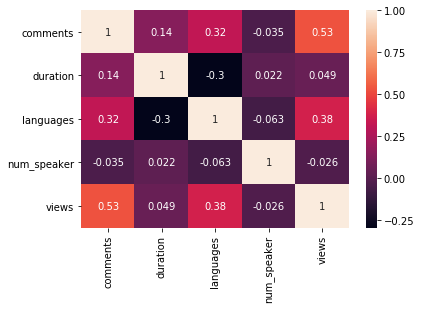

In [0]:
tmp = data.corr()
 
sns.heatmap(tmp, annot=True);

=> Num_speaker and view are not covariated

**Find the speaker has highest number of views**

In [0]:
data.groupby('main_speaker').views.sum().sort_values().tail(1)


main_speaker
Ken Robinson    63006281
Name: views, dtype: int64

**Find the title video has highest number of views**

In [0]:
data.sort_values(by='views').tail(1).title

0    Do schools kill creativity?
Name: title, dtype: object

**Find the event has highest number of video**

In [0]:
data.groupby('event').title.count().sort_values().tail(1)

event
TED2014    84
Name: title, dtype: int64

### Step 4 - Data visualization

**Visualize # of title per year**

AxesSubplot(0.125,0.125;0.775x0.755)


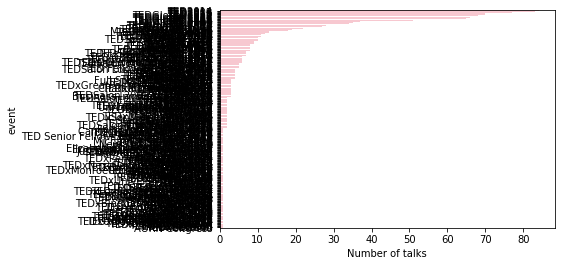

In [0]:

event=data.groupby('event')['title'].count().sort_values(ascending = False).reset_index(name='Number of talks')
ax = sns.barplot(x="Number of talks", y="event", data=event,color='pink',)
print(ax)

In [0]:
data.groupby("event")['title'].count()

event
AORN Congress                     1
Arbejdsglaede Live                1
BBC TV                            1
Bowery Poetry Club                1
Business Innovation Factory       3
Carnegie Mellon University        1
Chautauqua Institution            3
DICE Summit 2010                  1
DLD 2007                          1
EG 2007                          13
EG 2008                           8
Elizabeth G. Anderson School      1
Eric Whitacre's Virtual Choir     1
Fort Worth City Council           1
Full Spectrum Auditions           3
Gel Conference                    2
Global Witness HQ                 1
Handheld Learning                 1
Harvard University                1
INK Conference                    6
Justice with Michael Sandel       1
LIFT 2007                         1
Michael Howard Studios            1
Mission Blue II                   8
Mission Blue Voyage              18
New York State Senate             1
NextGen:Charity                   1
Princeton University  

**Visualize the distribution of the views**

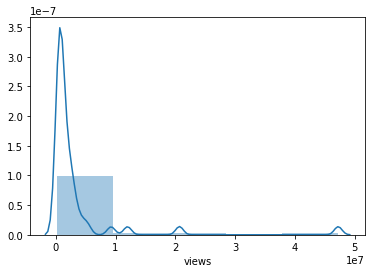

In [0]:
sns.distplot(data[data['event'] == 'TED2006']['views'], bins=5)